<a href="https://colab.research.google.com/github/jbarn112/MIS515-01-OOP/blob/main/Coding_Proj_One_Jacob_Barnett.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

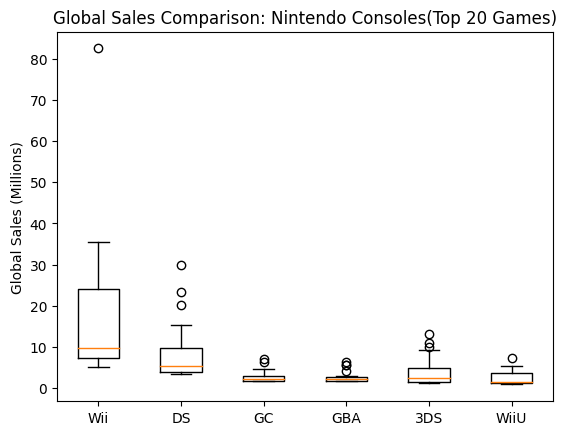

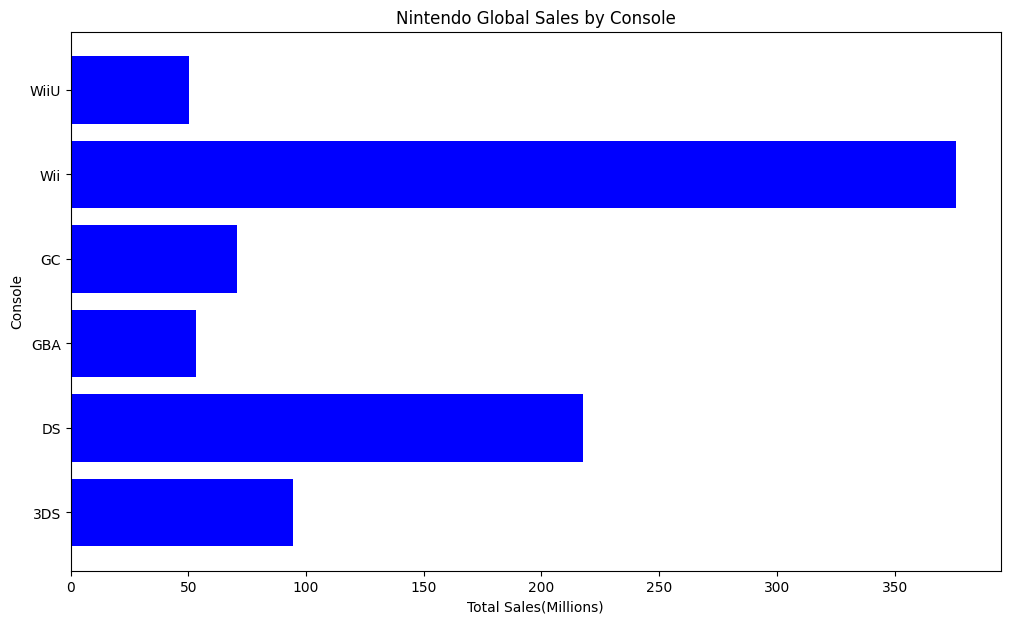

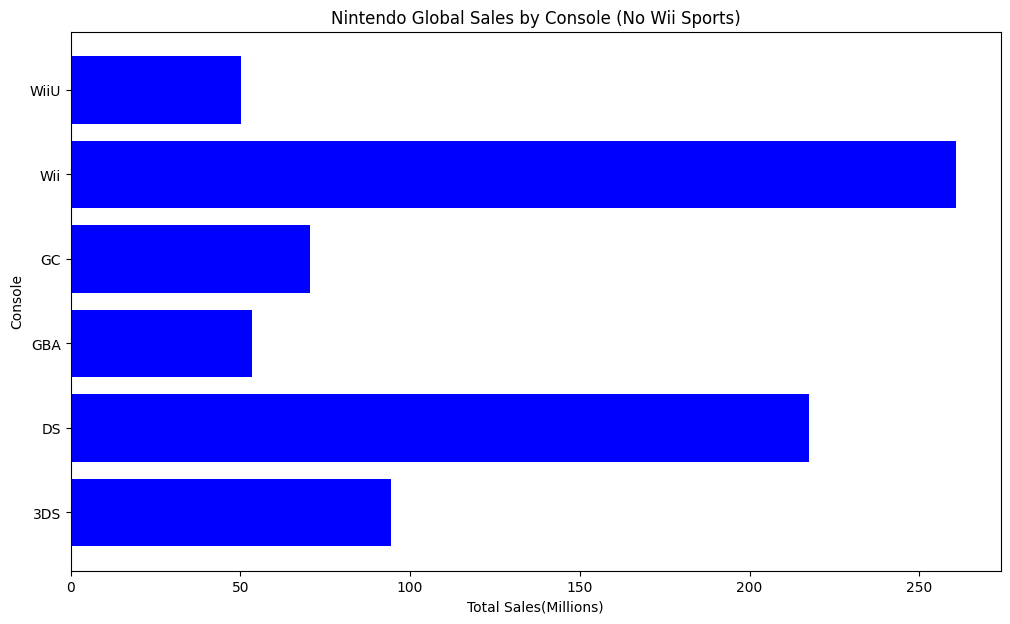

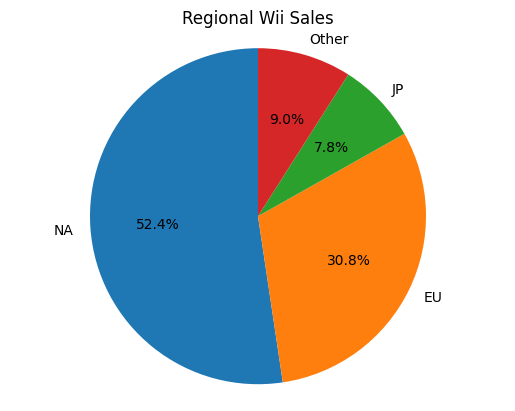

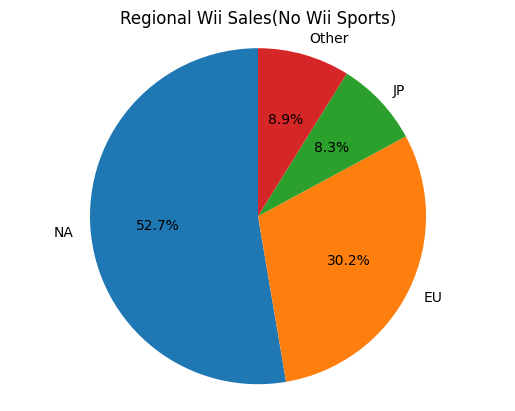

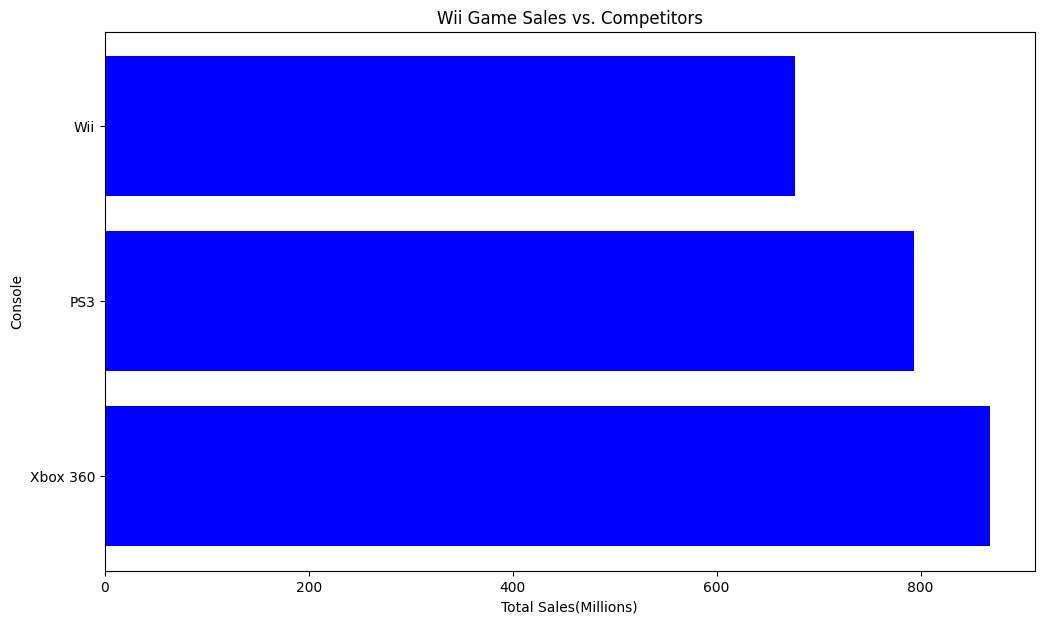

In [ ]:
import pandas as pd                      #importing all for data manip and display
import numpy as np
import matplotlib.pyplot as plt

#Pie Chart Function to get percentages of total sales
def Pie_chart_func(x,y):
  common_size = x/y
  return common_size * 100


#importing and reading data set
data_set = '/content/Project_one (1).xlsx' #copy in the path for the xlsx file
data_frame = pd.read_excel(data_set)



#Creating data frames for individual consoles
DS_data = data_frame[data_frame['Platform'] == 'DS']
GC_data = data_frame[data_frame['Platform'] == 'GC']
GBA_data = data_frame[data_frame['Platform'] == 'GBA']
ThreeDS_data = data_frame[data_frame['Platform'] == '3DS']
WiiU_data = data_frame[data_frame['Platform'] == 'WiiU']
wii_data = data_frame[data_frame['Platform'] == 'Wii']

#getting top 20 games for each console
wii_games = wii_data[['Global_Sales']]
Wii_games_top_20 = wii_games.head(20)

DS_games = DS_data[['Global_Sales']]
DS_games_top_20 = DS_games.head(20)

GC_games = GC_data[['Global_Sales']]
GC_games_top_20 = GC_games.head(20)

GBA_games = GBA_data[['Global_Sales']]
GBA_games_top_20 = GBA_games.head(20)

ThreeDS_games = ThreeDS_data[['Global_Sales']]
ThreeDS_games_top_20 = ThreeDS_games.head(20)

WiiU_games = WiiU_data[['Global_Sales']]
WiiU_games_top_20 = WiiU_games.head(20)


#setting list for Box plot and plotting by console
Box_data = [Wii_games_top_20['Global_Sales'].values, DS_games_top_20['Global_Sales'].values, GC_games_top_20['Global_Sales'].values, GBA_games_top_20['Global_Sales'].values, ThreeDS_games_top_20['Global_Sales'].values, WiiU_games_top_20['Global_Sales'].values]

plt.boxplot(Box_data, labels=['Wii', 'DS', 'GC','GBA','3DS','WiiU'])
plt.title('Global Sales Comparison: Nintendo Consoles(Top 20 Games)')
plt.ylabel('Global Sales (Millions)')
plt.show()

#setting Nintendo data drame for Nintendo Global Sales
nintendo_games = data_frame[data_frame['Publisher'] == 'Nintendo']
nintendo_Global_Sales_consoles = nintendo_games[['Platform', 'Global_Sales']]
sales_by_platform = nintendo_Global_Sales_consoles.groupby('Platform')['Global_Sales'].sum().reset_index()


#setting bar graph for Nintendo Global Sales by Platform
plt.figure(figsize=(12, 7))

plt.barh(sales_by_platform['Platform'], sales_by_platform['Global_Sales'], color='blue')
plt.title('Nintendo Global Sales by Console')
plt.xlabel('Total Sales(Millions)')
plt.ylabel('Console')

plt.show()



#What if no Wii Sports
#setting bar graph again but excluding Wii Sports
nintendo_games = data_frame[data_frame['Publisher'] == 'Nintendo']
nintendo_Global_Sales_consoles = nintendo_games[['Platform', 'Global_Sales']]
nintendo_Global_Sales_consoles = nintendo_Global_Sales_consoles.drop([0,2])


sales_by_platform_no_wii_sports = nintendo_Global_Sales_consoles.groupby('Platform')['Global_Sales'].sum().reset_index()
plt.figure(figsize=(12, 7))

plt.barh(sales_by_platform_no_wii_sports['Platform'], sales_by_platform_no_wii_sports['Global_Sales'], color='blue')
plt.title('Nintendo Global Sales by Console (No Wii Sports)')
plt.xlabel('Total Sales(Millions)')
plt.ylabel('Console')

plt.show()


# setting new data frame for Wii
wii_data = data_frame[data_frame['Platform'] == 'Wii']

# getting sums of Wii regional sales
wii_sales_NA = wii_data['NA_Sales'].sum()
Wii_sales_EU = wii_data['EU_Sales'].sum()
Wii_sales_JP = wii_data['JP_Sales'].sum()
Wii_sales_Other = wii_data['Other_Sales'].sum()

# getting sum of all regional sales
total_wii_sales = wii_sales_NA + Wii_sales_EU + Wii_sales_JP + Wii_sales_Other

# Running regional sales through function to get percentage of total sales
NA_pie = Pie_chart_func(wii_sales_NA,total_wii_sales)
EU_pie = Pie_chart_func(Wii_sales_EU,total_wii_sales)
JP_pie = Pie_chart_func(Wii_sales_JP,total_wii_sales)
Other_pie = Pie_chart_func(Wii_sales_Other,total_wii_sales)


# lists for pie chart variables
labels = ['NA', 'EU', 'JP', 'Other']
sizes = [NA_pie, EU_pie, JP_pie, Other_pie]

# setting parameters for Regional Wii Pie Chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Regional Wii Sales')
plt.show()


# setting new data frame for Wii and dropping Wii Sports
wii_data = data_frame[data_frame['Platform'] == 'Wii']
wii_data = wii_data.drop(index = 0)

# getting sums of Wii regional sales
wii_sales_NA = wii_data['NA_Sales'].sum()
Wii_sales_EU = wii_data['EU_Sales'].sum()
Wii_sales_JP = wii_data['JP_Sales'].sum()
Wii_sales_Other = wii_data['Other_Sales'].sum()



# getting sum of all regional sales
total_wii_sales = wii_sales_NA + Wii_sales_EU + Wii_sales_JP + Wii_sales_Other

# Running regional sales through function to get percentage of total sales
NA_pie = Pie_chart_func(wii_sales_NA,total_wii_sales)
EU_pie = Pie_chart_func(Wii_sales_EU,total_wii_sales)
JP_pie = Pie_chart_func(Wii_sales_JP,total_wii_sales)
Other_pie = Pie_chart_func(Wii_sales_Other,total_wii_sales)


# lists for pie chart variables
labels = ['NA', 'EU', 'JP', 'Other']
sizes = [NA_pie, EU_pie, JP_pie, Other_pie]

# setting parameters for Regional Wii Pie Chart without Wii Sports
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Regional Wii Sales(No Wii Sports)')
plt.show()


#comparing the data of Wii competitors
# getting the sums of Global Sales for all consoles

xbox_data = data_frame[data_frame['Platform'] == 'X360']
xbox_Global_Sales = xbox_data['Global_Sales'].sum()

PS_data = data_frame[data_frame['Platform'] == 'PS3']
PS_Global_Sales = PS_data['Global_Sales'].sum()

Wii_data = data_frame[data_frame['Platform'] == 'Wii']
Wii_Global_Sales = Wii_data['Global_Sales'].sum()



#plotting bar graph for competitors
plt.figure(figsize=(12, 7))
plt.barh(['Xbox 360', 'PS3', 'Wii'], [xbox_Global_Sales, PS_Global_Sales, Wii_Global_Sales], color='blue')
plt.title('Wii Game Sales vs. Competitors')
plt.xlabel('Total Sales(Millions)')
plt.ylabel('Console')

plt.show()




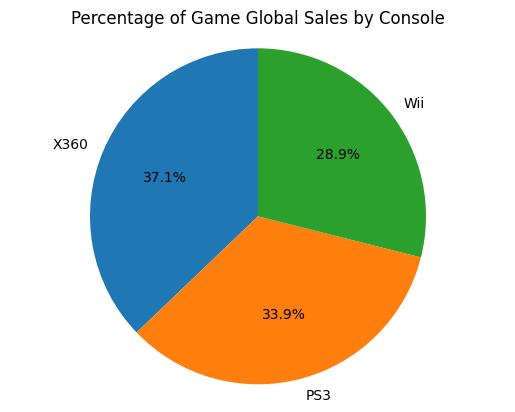

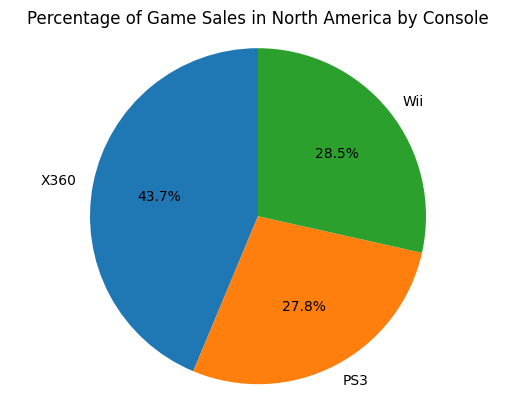

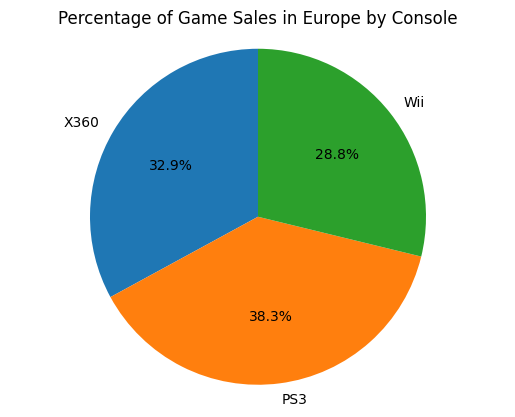

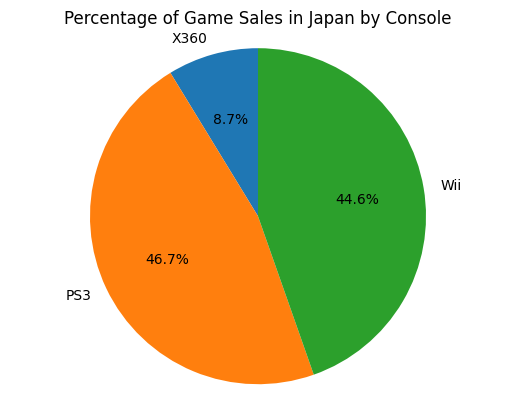

In [ ]:



#setting up data frames to get Global sales sums
X360_data = data_frame[data_frame['Platform'] == 'X360']
X360_global_sales = X360_data['Global_Sales'].sum()

PS3_data = data_frame[data_frame['Platform'] == 'PS3']
PS3_global_sales = PS3_data['Global_Sales'].sum()

Wii_data = data_frame[data_frame['Platform'] == 'Wii']
Wii_global_sales = Wii_data['Global_Sales'].sum()


#getting total of all consoles Global Sales for Pie chart function
total_sum = X360_global_sales + PS3_global_sales + Wii_global_sales

#Running through function to get percentage of total sales
X360_pie = Pie_chart_func(X360_global_sales,total_sum)
PS3_pie = Pie_chart_func(PS3_global_sales,total_sum)
Wii_pie = Pie_chart_func(Wii_global_sales,total_sum)


#setting up Global Sales Pie chart
labels = ['X360', 'PS3', 'Wii']
sizes = [X360_pie, PS3_pie, Wii_pie]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Game Global Sales by Console')
plt.show()



#repeating above steps for NA Sales
X360_data = data_frame[data_frame['Platform'] == 'X360']
X360_global_sales = X360_data['NA_Sales'].sum()

PS3_data = data_frame[data_frame['Platform'] == 'PS3']
PS3_global_sales = PS3_data['NA_Sales'].sum()

Wii_data = data_frame[data_frame['Platform'] == 'Wii']
Wii_global_sales = Wii_data['NA_Sales'].sum()

total_sum = X360_global_sales + PS3_global_sales + Wii_global_sales

X360_pie = Pie_chart_func(X360_global_sales,total_sum)
PS3_pie = Pie_chart_func(PS3_global_sales,total_sum)
Wii_pie = Pie_chart_func(Wii_global_sales,total_sum)

labels = ['X360', 'PS3', 'Wii']
sizes = [X360_pie, PS3_pie, Wii_pie]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Game Sales in North America by Console')
plt.show()


# Repeating for EU Sales
X360_data = data_frame[data_frame['Platform'] == 'X360']
X360_global_sales = X360_data['EU_Sales'].sum()

PS3_data = data_frame[data_frame['Platform'] == 'PS3']
PS3_global_sales = PS3_data['EU_Sales'].sum()

Wii_data = data_frame[data_frame['Platform'] == 'Wii']
Wii_global_sales = Wii_data['EU_Sales'].sum()

total_sum = X360_global_sales + PS3_global_sales + Wii_global_sales

X360_pie = Pie_chart_func(X360_global_sales,total_sum)
PS3_pie = Pie_chart_func(PS3_global_sales,total_sum)
Wii_pie = Pie_chart_func(Wii_global_sales,total_sum)

labels = ['X360', 'PS3', 'Wii']
sizes = [X360_pie, PS3_pie, Wii_pie]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Game Sales in Europe by Console')
plt.show()


#Repeating for Japan Sales
X360_data = data_frame[data_frame['Platform'] == 'X360']
X360_global_sales = X360_data['JP_Sales'].sum()

PS3_data = data_frame[data_frame['Platform'] == 'PS3']
PS3_global_sales = PS3_data['JP_Sales'].sum()

Wii_data = data_frame[data_frame['Platform'] == 'Wii']
Wii_global_sales = Wii_data['JP_Sales'].sum()

total_sum = X360_global_sales + PS3_global_sales + Wii_global_sales

X360_pie = Pie_chart_func(X360_global_sales,total_sum)
PS3_pie = Pie_chart_func(PS3_global_sales,total_sum)
Wii_pie = Pie_chart_func(Wii_global_sales,total_sum)

labels = ['X360', 'PS3', 'Wii']
sizes = [X360_pie, PS3_pie, Wii_pie]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Game Sales in Japan by Console')
plt.show()


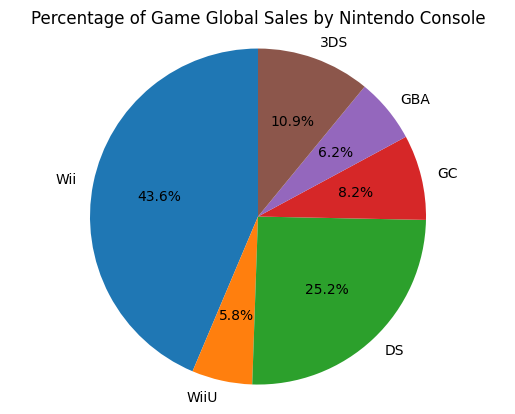

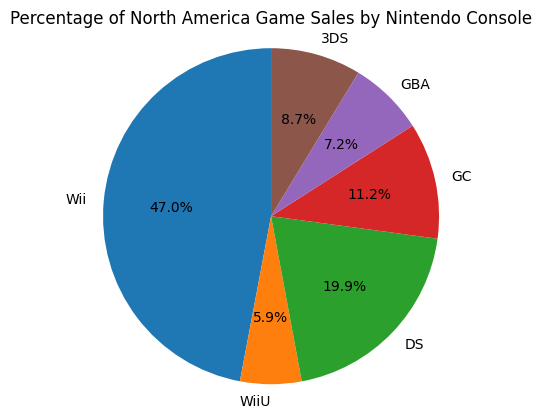

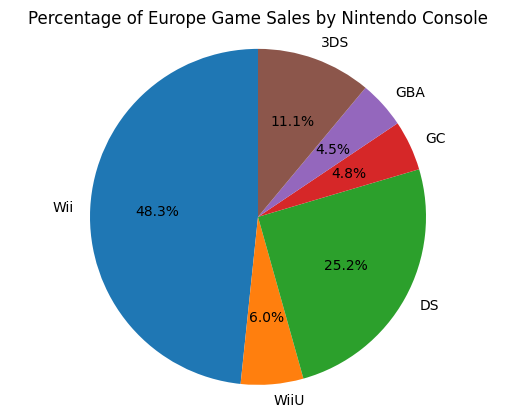

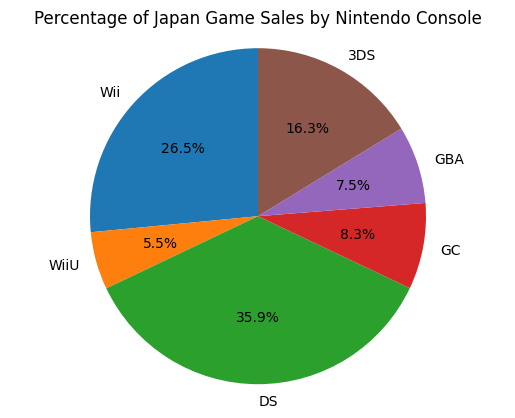

In [ ]:
nintendo_games = data_frame[data_frame['Publisher'] == 'Nintendo']

#getting Global Sales sums for each nintento console

Wii_data = nintendo_games[nintendo_games['Platform'] == 'Wii']
Wii_Global_Sales = Wii_data['Global_Sales'].sum()

WiiU_data = nintendo_games[nintendo_games['Platform'] == 'WiiU']
WiiU_Global_Sales = WiiU_data['Global_Sales'].sum()

DS_data = nintendo_games[nintendo_games['Platform'] == 'DS']
DS_Global_Sales = DS_data['Global_Sales'].sum()

GC_data = nintendo_games[nintendo_games['Platform'] == 'GC']
GC_Global_Sales = GC_data['Global_Sales'].sum()

GBA_data = nintendo_games[nintendo_games['Platform'] == 'GBA']
GBA_Global_Sales = GBA_data['Global_Sales'].sum()

ThreeDS_data = nintendo_games[nintendo_games['Platform'] == '3DS']
ThreeDS_Global_Sales = ThreeDS_data['Global_Sales'].sum()

#getting total of all console Global Sales

total_sum = Wii_Global_Sales + WiiU_Global_Sales + DS_Global_Sales + GC_Global_Sales + GBA_Global_Sales + ThreeDS_Global_Sales

#running each console through Pie Chart Function
wii_pie = Pie_chart_func(Wii_Global_Sales,total_sum)
WiiU_pie = Pie_chart_func(WiiU_Global_Sales,total_sum)
DS_pie = Pie_chart_func(DS_Global_Sales,total_sum)
GC_pie = Pie_chart_func(GC_Global_Sales,total_sum)
GBA_pie = Pie_chart_func(GBA_Global_Sales,total_sum)
ThreeDS_pie = Pie_chart_func(ThreeDS_Global_Sales,total_sum)


#setting up Pie Chart for Global Sales
labels = ['Wii', 'WiiU', 'DS', 'GC', 'GBA', '3DS']
sizes = [wii_pie, WiiU_pie, DS_pie, GC_pie, GBA_pie, ThreeDS_pie]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Game Global Sales by Nintendo Console')
plt.show()




#repeating Above Steps for NA Sales
Wii_data = nintendo_games[nintendo_games['Platform'] == 'Wii']
Wii_Global_Sales = Wii_data['NA_Sales'].sum()

WiiU_data = nintendo_games[nintendo_games['Platform'] == 'WiiU']
WiiU_Global_Sales = WiiU_data['NA_Sales'].sum()

DS_data = nintendo_games[nintendo_games['Platform'] == 'DS']
DS_Global_Sales = DS_data['NA_Sales'].sum()

GC_data = nintendo_games[nintendo_games['Platform'] == 'GC']
GC_Global_Sales = GC_data['NA_Sales'].sum()

GBA_data = nintendo_games[nintendo_games['Platform'] == 'GBA']
GBA_Global_Sales = GBA_data['NA_Sales'].sum()

ThreeDS_data = nintendo_games[nintendo_games['Platform'] == '3DS']
ThreeDS_Global_Sales = ThreeDS_data['NA_Sales'].sum()

total_sum = Wii_Global_Sales + WiiU_Global_Sales + DS_Global_Sales + GC_Global_Sales + GBA_Global_Sales + ThreeDS_Global_Sales

#NA Pie Chart Functions
wii_pie = Pie_chart_func(Wii_Global_Sales,total_sum)
WiiU_pie = Pie_chart_func(WiiU_Global_Sales,total_sum)
DS_pie = Pie_chart_func(DS_Global_Sales,total_sum)
GC_pie = Pie_chart_func(GC_Global_Sales,total_sum)
GBA_pie = Pie_chart_func(GBA_Global_Sales,total_sum)
ThreeDS_pie = Pie_chart_func(ThreeDS_Global_Sales,total_sum)


#NA Pie Chart
labels = ['Wii', 'WiiU', 'DS', 'GC', 'GBA', '3DS']
sizes = [wii_pie, WiiU_pie, DS_pie, GC_pie, GBA_pie, ThreeDS_pie]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of North America Game Sales by Nintendo Console')
plt.show()


#Repeating steps for EU Sales
Wii_data = nintendo_games[nintendo_games['Platform'] == 'Wii']
Wii_Global_Sales = Wii_data['EU_Sales'].sum()

WiiU_data = nintendo_games[nintendo_games['Platform'] == 'WiiU']
WiiU_Global_Sales = WiiU_data['EU_Sales'].sum()

DS_data = nintendo_games[nintendo_games['Platform'] == 'DS']
DS_Global_Sales = DS_data['EU_Sales'].sum()

GC_data = nintendo_games[nintendo_games['Platform'] == 'GC']
GC_Global_Sales = GC_data['EU_Sales'].sum()

GBA_data = nintendo_games[nintendo_games['Platform'] == 'GBA']
GBA_Global_Sales = GBA_data['EU_Sales'].sum()

ThreeDS_data = nintendo_games[nintendo_games['Platform'] == '3DS']
ThreeDS_Global_Sales = ThreeDS_data['EU_Sales'].sum()

total_sum = Wii_Global_Sales + WiiU_Global_Sales + DS_Global_Sales + GC_Global_Sales + GBA_Global_Sales + ThreeDS_Global_Sales


#EU pie chrart functions
wii_pie = Pie_chart_func(Wii_Global_Sales,total_sum)
WiiU_pie = Pie_chart_func(WiiU_Global_Sales,total_sum)
DS_pie = Pie_chart_func(DS_Global_Sales,total_sum)
GC_pie = Pie_chart_func(GC_Global_Sales,total_sum)
GBA_pie = Pie_chart_func(GBA_Global_Sales,total_sum)
ThreeDS_pie = Pie_chart_func(ThreeDS_Global_Sales,total_sum)


#EU Pie Charts
labels = ['Wii', 'WiiU', 'DS', 'GC', 'GBA', '3DS']
sizes = [wii_pie, WiiU_pie, DS_pie, GC_pie, GBA_pie, ThreeDS_pie]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Europe Game Sales by Nintendo Console')
plt.show()


#Repeating steps for Japan Sales
Wii_data = nintendo_games[nintendo_games['Platform'] == 'Wii']
Wii_Global_Sales = Wii_data['JP_Sales'].sum()

WiiU_data = nintendo_games[nintendo_games['Platform'] == 'WiiU']
WiiU_Global_Sales = WiiU_data['JP_Sales'].sum()

DS_data = nintendo_games[nintendo_games['Platform'] == 'DS']
DS_Global_Sales = DS_data['JP_Sales'].sum()

GC_data = nintendo_games[nintendo_games['Platform'] == 'GC']
GC_Global_Sales = GC_data['JP_Sales'].sum()

GBA_data = nintendo_games[nintendo_games['Platform'] == 'GBA']
GBA_Global_Sales = GBA_data['JP_Sales'].sum()

ThreeDS_data = nintendo_games[nintendo_games['Platform'] == '3DS']
ThreeDS_Global_Sales = ThreeDS_data['JP_Sales'].sum()

#Japan Pie Chart Functions

total_sum = Wii_Global_Sales + WiiU_Global_Sales + DS_Global_Sales + GC_Global_Sales + GBA_Global_Sales + ThreeDS_Global_Sales
wii_pie = Pie_chart_func(Wii_Global_Sales,total_sum)
WiiU_pie = Pie_chart_func(WiiU_Global_Sales,total_sum)
DS_pie = Pie_chart_func(DS_Global_Sales,total_sum)
GC_pie = Pie_chart_func(GC_Global_Sales,total_sum)
GBA_pie = Pie_chart_func(GBA_Global_Sales,total_sum)
ThreeDS_pie = Pie_chart_func(ThreeDS_Global_Sales,total_sum)

#Japan Pie Chart
labels = ['Wii', 'WiiU', 'DS', 'GC', 'GBA', '3DS']
sizes = [wii_pie, WiiU_pie, DS_pie, GC_pie, GBA_pie, ThreeDS_pie]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Japan Game Sales by Nintendo Console')
plt.show()